- Understanding the consumption pattern for credit cards at an individual consumer level is important for customer relationship management. 
- This understanding allows banks to customize for consumers and make strategic marketing plans.
- Thus it is imperative to study the relationship between the characteristics of the consumers and their consumption patterns. 
- XYZ Bank has given a sample of their customers, along with their details like age, gender and other demographics. 
- Also shared are information on liabilities, assets and history of transactions with the bank for each customer. 
- In addition to the above, data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September). 
- Predict the average spend for a different set of customers for the coming 3 months.

### Overview
- This is a regression problem where you need to predict the average spend of customers for the next 3 months.

### Data Description
### TRAIN.csv
- It contains the training data with advertisement details as described in the last section.

### Data_Dictionary.xlsx
- It contains information about the features of the dataset.

### TEST.csv
- It has details of the customer for which we have to predict the spend for the next 3 months.

### sample_submission.csv
- It contains the submission format for the predictions against the test set. A single CSV needs to be submitted as a solution.

### Evaluation Metric
- Submissions are evaluated using 100 * RMSLE

### Note #:

- The default score of 0 could show up if you have not made any final submission from your submissions.
- You can make as many final submissions as you want(It's called 'final' because whatever is your last "final" submission before the deadline, that will be the submission accepted)

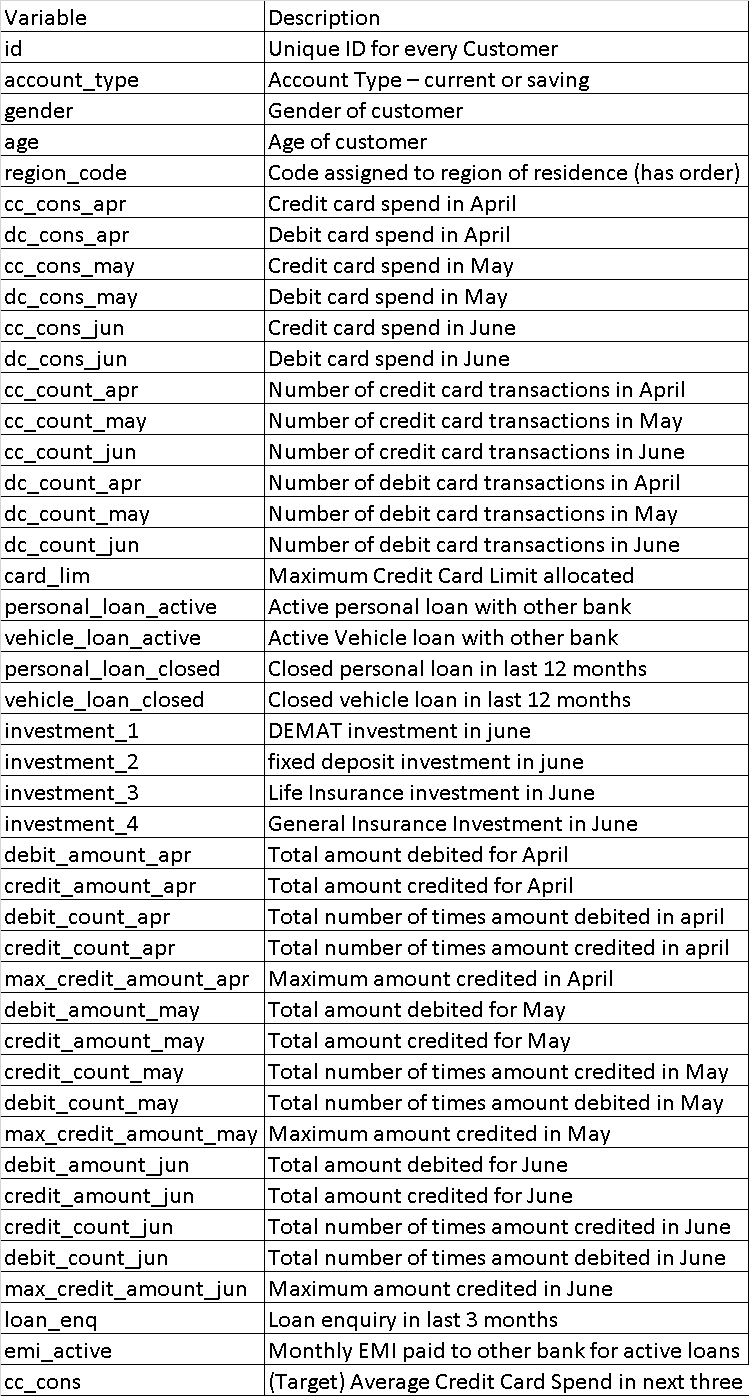

### Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn import preprocessing 
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#Loading the train dataset and having a glimpse of first few records
train_data = pd.read_csv('data/TRAIN.csv')
train_data.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,31715,current,M,41,723,30292.00,NaN,2679.49,NaN,17032.745,...,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,NaN,3083.69,12163
1,23099,current,M,41,523,9552.05,1867.67,3806.00,473.43,2234.000,...,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,NaN,3953.04,680
2,20982,current,M,36,864,6204.21,NaN,830.60,NaN,1353.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200
3,455,current,M,38,349,40877.62,NaN,19729.60,NaN,30446.610,...,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,NaN,4059.07,1676
4,20382,current,M,48,523,10046.00,NaN,6046.00,NaN,1151.400,...,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,NaN,5804.29,1603


In [3]:
#Identifying the features available in the dataset.
print("ID \t Columns")
for idx, i in enumerate(train_data.columns):
    print("{} \t {}".format(idx,  i))

ID 	 Columns
0 	 id
1 	 account_type
2 	 gender
3 	 age
4 	 region_code
5 	 cc_cons_apr
6 	 dc_cons_apr
7 	 cc_cons_may
8 	 dc_cons_may
9 	 cc_cons_jun
10 	 dc_cons_jun
11 	 cc_count_apr
12 	 cc_count_may
13 	 cc_count_jun
14 	 dc_count_apr
15 	 dc_count_may
16 	 dc_count_jun
17 	 card_lim
18 	 personal_loan_active
19 	 vehicle_loan_active
20 	 personal_loan_closed
21 	 vehicle_loan_closed
22 	 investment_1
23 	 investment_2
24 	 investment_3
25 	 investment_4
26 	 debit_amount_apr
27 	 credit_amount_apr
28 	 debit_count_apr
29 	 credit_count_apr
30 	 max_credit_amount_apr
31 	 debit_amount_may
32 	 credit_amount_may
33 	 credit_count_may
34 	 debit_count_may
35 	 max_credit_amount_may
36 	 debit_amount_jun
37 	 credit_amount_jun
38 	 credit_count_jun
39 	 debit_count_jun
40 	 max_credit_amount_jun
41 	 loan_enq
42 	 emi_active
43 	 cc_cons


In [4]:
#To determine the distribution of the data in each feature.
train_data.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,24615.000000,24615.000000,24615.000000,24615.000000,10276.000000,2.461500e+04,11595.000000,24615.000000,8678.000000,22847.000000,...,23041.000000,23041.000000,2.204800e+04,2.292000e+04,2.342900e+04,23443.000000,23443.000000,2.342900e+04,2.461500e+04,24615.000000
mean,16352.306602,35.910867,554.286289,16724.699679,5837.704149,1.449078e+04,5778.853761,9034.903220,4580.288176,9.195649,...,4.093703,13.939716,4.980322e+04,7.775094e+04,7.605872e+04,5.789404,16.023546,4.509387e+04,1.051152e+04,6833.298639
std,9422.382515,8.350756,188.502571,25557.121858,12149.234942,2.428710e+04,15169.627917,15579.128037,9440.029274,11.449178,...,3.885775,11.501255,1.252070e+05,3.080153e+05,2.981304e+05,4.749826,13.415936,1.274878e+05,3.009496e+05,12689.409718
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,...,0.000000,0.000000,1.500000e-01,5.230000e+00,1.300000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,8182.500000,31.000000,425.000000,3707.050000,844.487500,2.981930e+03,797.000000,1626.000000,740.000000,3.000000,...,2.000000,6.000000,1.809474e+04,2.518399e+04,2.310900e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1275.500000
50%,16339.000000,34.000000,575.000000,8911.300000,2294.320000,7.338500e+03,2132.000000,4153.000000,1823.000000,7.000000,...,3.000000,11.000000,3.000000e+04,4.616739e+04,4.313000e+04,5.000000,13.000000,2.685405e+04,1.676600e+02,3118.000000
75%,24435.500000,39.000000,683.000000,19896.860000,6163.252500,1.694145e+04,5651.095000,10224.570000,4558.000000,12.000000,...,5.000000,19.000000,5.000000e+04,8.424984e+04,8.061868e+04,7.000000,22.000000,4.680320e+04,4.187245e+03,7310.000000
max,32820.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,167311.000000,1012.000000,...,71.000000,171.000000,1.285103e+07,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07,4.468722e+07,408630.000000


In [5]:
#Fetching count and data type of each feature.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24615 entries, 0 to 24614
Data columns (total 44 columns):
id                       24615 non-null int64
account_type             24615 non-null object
gender                   24615 non-null object
age                      24615 non-null int64
region_code              24615 non-null int64
cc_cons_apr              24615 non-null float64
dc_cons_apr              10276 non-null float64
cc_cons_may              24615 non-null float64
dc_cons_may              11595 non-null float64
cc_cons_jun              24615 non-null float64
dc_cons_jun              8678 non-null float64
cc_count_apr             22847 non-null float64
cc_count_may             23756 non-null float64
cc_count_jun             23437 non-null float64
dc_count_apr             10276 non-null float64
dc_count_may             11595 non-null float64
dc_count_jun             12955 non-null float64
card_lim                 24609 non-null float64
personal_loan_active     1992 non-nu

In [6]:
#Determining the percentage of NaN values in each feature.
(train_data.isnull().sum())/len(train_data)*100

id                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
cc_cons_apr               0.000000
dc_cons_apr              58.253098
cc_cons_may               0.000000
dc_cons_may              52.894576
cc_cons_jun               0.000000
dc_cons_jun              64.745074
cc_count_apr              7.182612
cc_count_may              3.489742
cc_count_jun              4.785700
dc_count_apr             58.253098
dc_count_may             52.894576
dc_count_jun             47.369490
card_lim                  0.024375
personal_loan_active     91.907374
vehicle_loan_active      97.428397
personal_loan_closed     91.249238
vehicle_loan_closed      95.039610
investment_1             95.774934
investment_2             92.996141
investment_3             95.953687
investment_4             98.773106
debit_amount_apr          5.793216
credit_amount_apr        10.237660
debit_count_apr     

### Observations:
- There are traces of NaN values
- There are 44 columns in the dataset
- Mean is greater than Median for most of the features, the distribution is Right Skewed.
- Most of the features are numerical except "account_type", "gender" and "loan_enq"
- The below mentioned columns has low predicting power due to majority of its record being NaN
        personal_loan_active
        vehicle_loan_active
        personal_loan_closed
        vehicle_loan_closed
        investment_1
        investment_2
        investment_3
        investment_4
        loan_enq                 
- Also, the below features are depicting the debit card usage. Although it might have been a supportive element to understand the users wealth, the prediction becomes apprehensive with only 50% data, and, imputing 50% of data might not be qualitative(Assumption) . We shall consider removing these features only if the ML prediction is hampered by these parameters.
        dc_cons_apr
        dc_cons_may
        dc_cons_jun
        dc_count_apr
        dc_count_may
        dc_count_jun     

### Data Cleaning

In [7]:
#With reference to above observations, the columns that had more than 50% of NaN values will be dropped.
#, 'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun'
train_data = train_data.drop(['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'loan_enq'], axis = True)

In [8]:
train_data.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons'],
      dtype='object')

In [9]:
#Determining the percentage of NaN values in each feature.
(train_data.isnull().sum())/len(train_data)*100

id                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
cc_cons_apr               0.000000
dc_cons_apr              58.253098
cc_cons_may               0.000000
dc_cons_may              52.894576
cc_cons_jun               0.000000
dc_cons_jun              64.745074
cc_count_apr              7.182612
cc_count_may              3.489742
cc_count_jun              4.785700
dc_count_apr             58.253098
dc_count_may             52.894576
dc_count_jun             47.369490
card_lim                  0.024375
debit_amount_apr          5.793216
credit_amount_apr        10.237660
debit_count_apr           5.427585
credit_count_apr          5.427585
max_credit_amount_apr    10.237660
debit_amount_may          7.121674
credit_amount_may        10.428600
credit_count_may          6.394475
debit_count_may           6.394475
max_credit_amount_may    10.428600
debit_amount_jun    

In [10]:
#Imputing the dataset with Median
train_data.fillna(train_data.median(), inplace = True)

In [11]:
#Cross checking to ensure the dataset is imputed and there is no NaN values
(train_data.isnull().sum())/len(train_data)*100

id                       0.0
account_type             0.0
gender                   0.0
age                      0.0
region_code              0.0
cc_cons_apr              0.0
dc_cons_apr              0.0
cc_cons_may              0.0
dc_cons_may              0.0
cc_cons_jun              0.0
dc_cons_jun              0.0
cc_count_apr             0.0
cc_count_may             0.0
cc_count_jun             0.0
dc_count_apr             0.0
dc_count_may             0.0
dc_count_jun             0.0
card_lim                 0.0
debit_amount_apr         0.0
credit_amount_apr        0.0
debit_count_apr          0.0
credit_count_apr         0.0
max_credit_amount_apr    0.0
debit_amount_may         0.0
credit_amount_may        0.0
credit_count_may         0.0
debit_count_may          0.0
max_credit_amount_may    0.0
debit_amount_jun         0.0
credit_amount_jun        0.0
credit_count_jun         0.0
debit_count_jun          0.0
max_credit_amount_jun    0.0
emi_active               0.0
cc_cons       

In [13]:
train_data.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,31715,current,M,41,723,30292.00,2294.32,2679.49,2132.00,17032.745,...,6.0,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.00,3083.69,12163
1,23099,current,M,41,523,9552.05,1867.67,3806.00,473.43,2234.000,...,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.00,3953.04,680
2,20982,current,M,36,864,6204.21,2294.32,830.60,2132.00,1353.750,...,3.0,11.0,30000.0,46167.39,43130.0,5.0,13.0,26854.05,0.00,200
3,455,current,M,38,349,40877.62,2294.32,19729.60,2132.00,30446.610,...,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.00,4059.07,1676
4,20382,current,M,48,523,10046.00,2294.32,6046.00,2132.00,1151.400,...,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.00,5804.29,1603


### Observations:
- The features with more than 50% NaN values are dropped
- The features with less percentage of NaN values are treated by filling them with Median values

### EDA

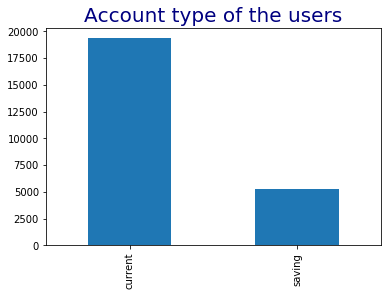


Percentage of Account Type:


current    0.786594
saving     0.213406
Name: account_type, dtype: float64

In [14]:
#Determining the majority of users, with reference to account type
train_data['account_type'].value_counts().plot(kind = 'bar')
plt.title("Account type of the users", fontsize = 20, color = 'navy')
plt.show()

print("\nPercentage of Account Type:")
train_data['account_type'].value_counts()/(len(train_data))

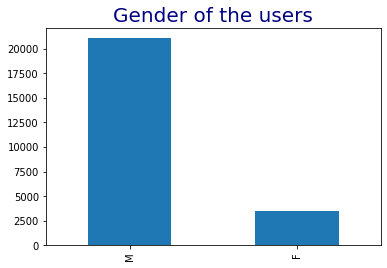


Percentage of Gender:


M    0.856917
F    0.143083
Name: gender, dtype: float64

In [15]:
#Determining the majority of users, with reference to gender
train_data['gender'].value_counts().plot(kind = 'bar')
plt.title("Gender of the users", fontsize = 20, color = 'navy')
plt.show()

print("\nPercentage of Gender:")
train_data['gender'].value_counts()/(len(train_data))

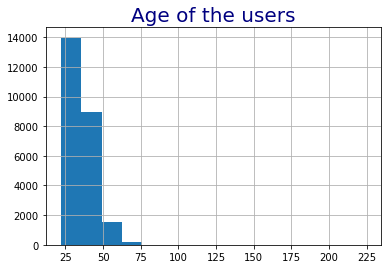

In [16]:
#Determining the majority of users, with reference to age
train_data['age'].hist(bins = 15)
plt.title("Age of the users", fontsize = 20, color = 'navy')
plt.show()

### Observations on Categorical data
        -The users with Current Account seems to be the top consumers, the intuition is that the credit might be for business purposes.
        -Male are leading in the credit card consumption.
        -Uses in the range 20 yrs to 50 yrs are the top consumers.

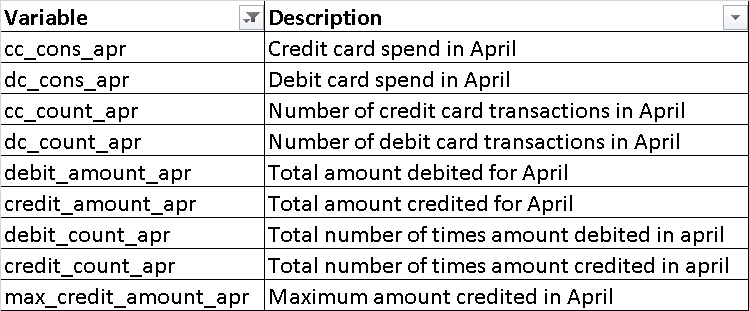

In [17]:
#Sampling only the April data to understand the pattern
train_data[['cc_cons_apr','cc_count_apr','credit_amount_apr','credit_count_apr', 'max_credit_amount_apr','debit_amount_apr','debit_count_apr','card_lim','emi_active']].head()

,cc_cons_apr,cc_count_apr,credit_amount_apr,credit_count_apr,max_credit_amount_apr,debit_amount_apr,debit_count_apr,card_lim,emi_active
0,30292.00,3.0,58341.0,4.0,54240.0,60454.78,10.0,200000.0,3083.69
1,9552.05,2.0,33714.0,2.0,20000.0,32652.47,19.0,16000.0,3953.04
2,6204.21,14.0,43997.0,3.0,28049.0,41130.80,12.0,30000.0,0.00
3,40877.62,12.0,25067.0,1.0,24795.0,3203.25,3.0,50000.0,4059.07
4,10046.00,2.0,41012.4,4.0,40000.0,74823.50,16.0,300000.0,5804.29


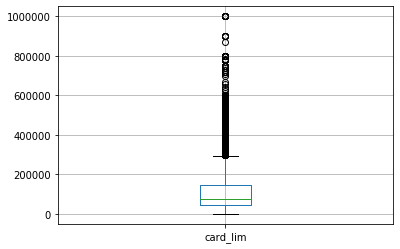

In [18]:
train_data.boxplot(column='card_lim')

In [19]:
train_data['emi_active'].value_counts().head(10)

0.00       11803
2500.00        3
3750.00        3
660.66         2
1129.03        2
6832.35        2
2370.58        2
2404.72        2
471.38         2
5299.43        2
Name: emi_active, dtype: int64

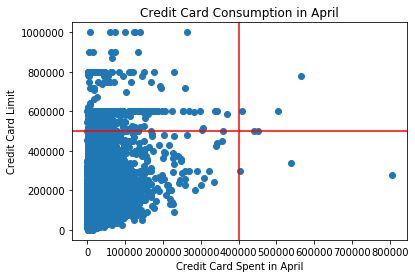

In [20]:
# Scatterplot of Credit Card Consumption vs. Card Limit
plt.scatter(train_data['cc_cons_apr'], train_data['card_lim'])
plt.title("Credit Card Consumption in April")
plt.xlabel('Credit Card Spent in April')
plt.ylabel('Credit Card Limit')
plt.axhline(500000, color='red')
plt.axvline(400000, color='red')
plt.show()

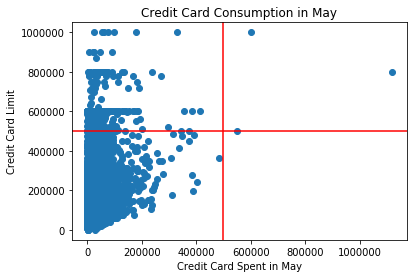

In [21]:
# Scatterplot of Credit Card Consumption vs. Card Limit
plt.scatter(train_data['cc_cons_may'], train_data['card_lim'])
plt.title("Credit Card Consumption in May")
plt.xlabel('Credit Card Spent in May')
plt.ylabel('Credit Card Limit')
plt.axhline(500000, color='red')
plt.axvline(500000, color='red')
plt.show()

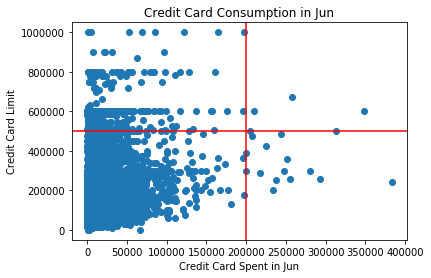

In [22]:
# Scatterplot of Credit Card Consumption vs. Card Limit
plt.scatter(train_data['cc_cons_jun'], train_data['card_lim'])
plt.title("Credit Card Consumption in Jun")
plt.xlabel('Credit Card Spent in Jun')
plt.ylabel('Credit Card Limit')
plt.axhline(500000, color='red')
plt.axvline(200000, color='red')
plt.show()

In [23]:
# Function to plot continous plots
def plot_cont(df,plt_typ):
    """ Univariate analysis of Numerical columns
    
    This function accepts the dataframe df, plt_type(boxplot/distplot) which analyzes all the variable in the data and performs the univariate analysis using boxplot or distplot plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    plt_type - type of plot through which you want to visualize the data
    
    """
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    df = df[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            
            if plt_typ == "boxplot": 
                sns.boxplot(df[numeric_columns[i]])
                plt.subplot(122)            
                sns.boxplot(df[numeric_columns[i+1]])
            elif plt_typ == "distplot":
                sns.distplot(df[numeric_columns[i]])
                plt.subplot(122)            
                sns.distplot(df[numeric_columns[i+1]])  
            else:
                print("Pass either distplot/boxplot")
                
        plt.tight_layout()
        plt.show()

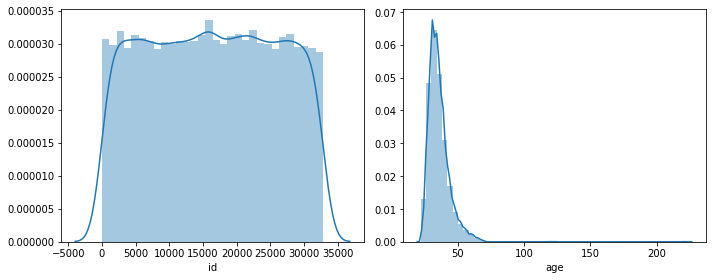

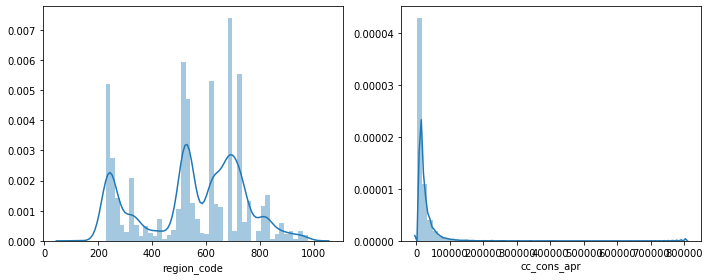

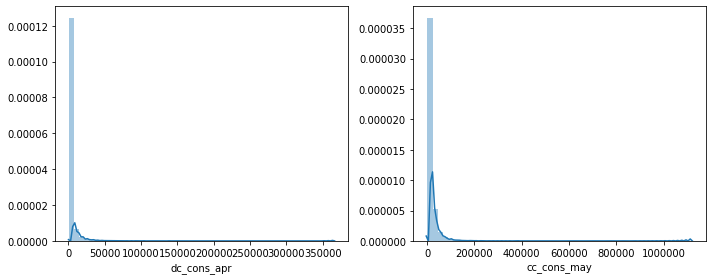

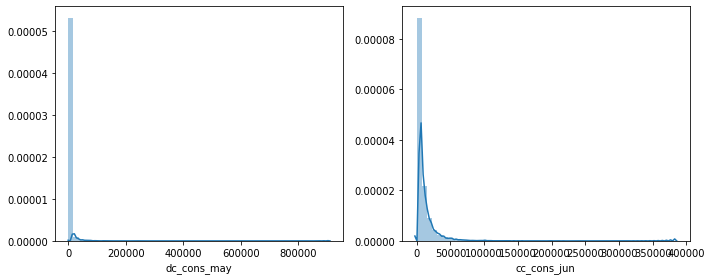

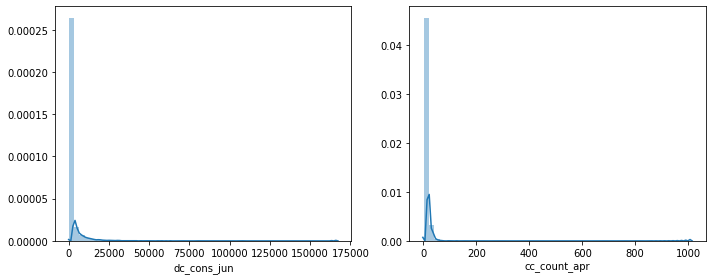

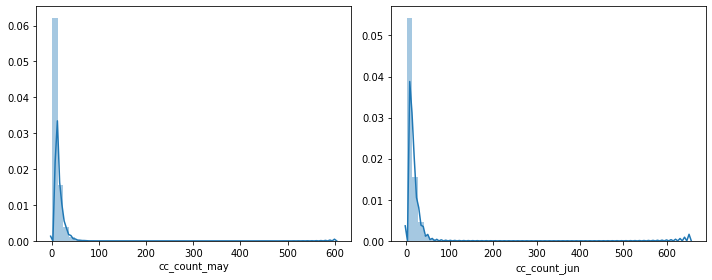

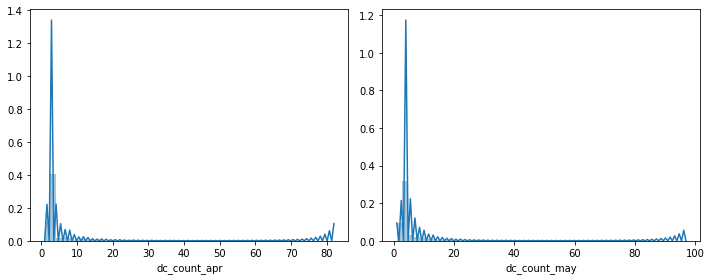

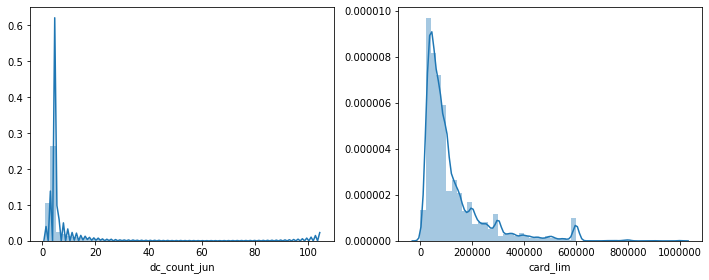

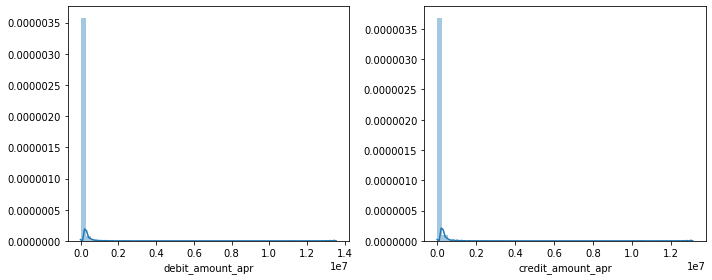

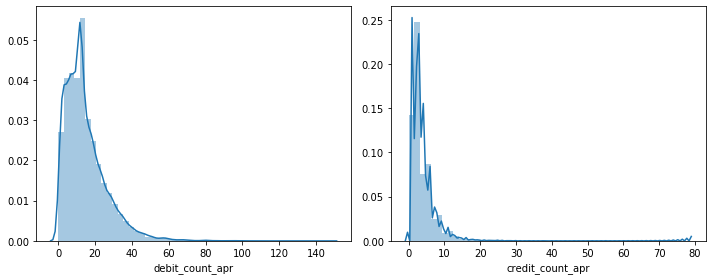

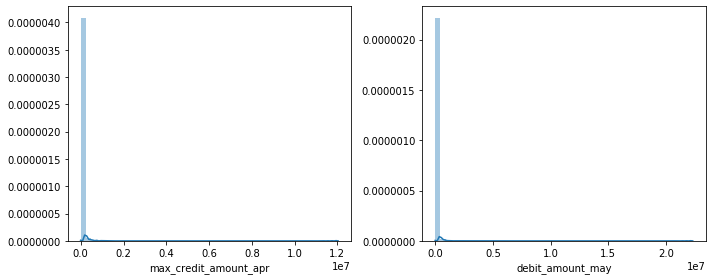

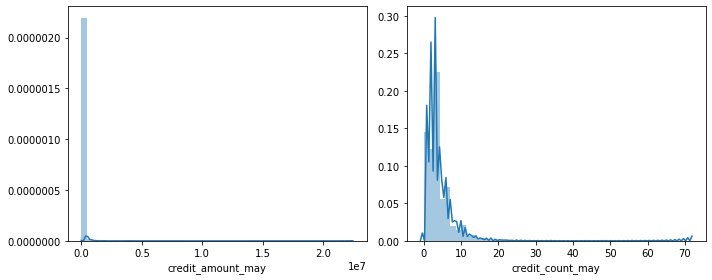

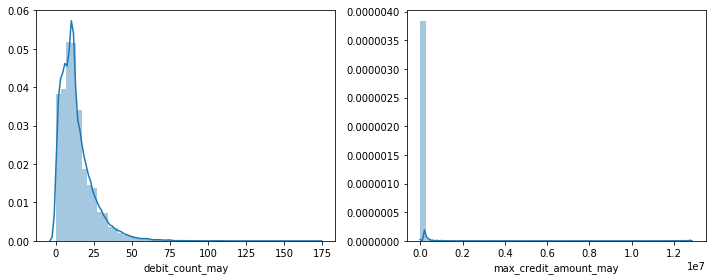

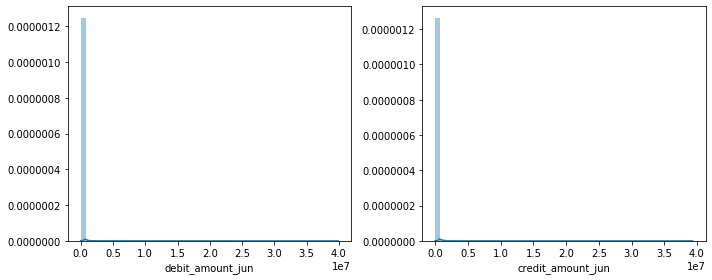

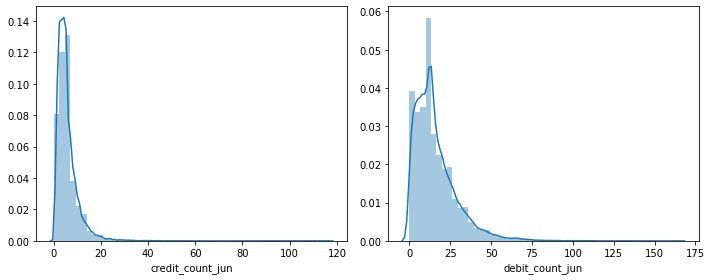

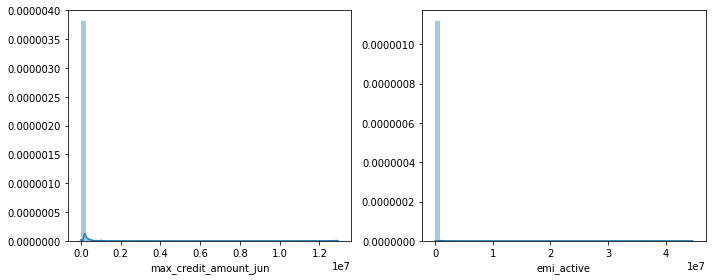

<Figure size 432x288 with 0 Axes>

In [24]:
plot_cont(train_data,'distplot')

### Observation on Numerical data
    - The maximum users have card limit below 300000.
    - There are outliers; people with card limit beyond 300000
    - 48% of users does not have an active EMI
    - Users with higher card limit doesn't seem to spend high.
    - The data is skewed to the right and needs to be regularized.    

In [25]:
#Converting the right skewed data into log
columns = train_data.select_dtypes(include='number')
log_data = train_data.copy()

for col in columns:
    log_data[col] = np.log(1 + log_data[col])

In [26]:
 log_data.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,10.364577,current,M,3.737670,6.584791,10.318672,7.738628,7.893755,7.665285,9.742952,...,1.945910,2.197225,11.208165,11.003335,10.969198,1.609438,2.397895,10.888576,8.034206,9.406236
1,10.047588,current,M,3.737670,6.261492,9.164616,7.532982,8.244597,6.162114,7.711997,...,1.098612,2.197225,9.358847,9.075707,8.951181,1.098612,2.564949,8.936035,8.282493,6.523562
2,9.951468,current,M,3.610918,6.762730,8.733145,7.738628,6.723352,7.665285,7.211372,...,1.386294,2.484907,10.308986,10.740051,10.671997,1.791759,2.639057,10.198209,0.000000,5.303305
3,6.122493,current,M,3.663562,5.857933,10.618362,7.738628,9.889926,7.665285,10.323763,...,0.693147,1.098612,10.121015,10.897101,10.925903,1.386294,1.609438,10.308986,8.308955,7.424762
4,9.922456,current,M,3.891820,6.261492,9.215029,7.738628,8.707318,7.665285,7.049602,...,2.079442,2.772589,10.819798,11.174813,11.778998,2.197225,2.833213,10.915107,8.666525,7.380256


In [27]:
log_data.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons'],
      dtype='object')

In [28]:
#dropping the id column as it is unique and would not contribute to the predicting power.

log_data = log_data.drop(columns = ['id'],axis=1)

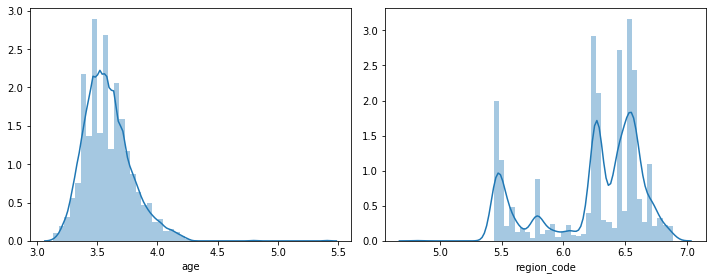

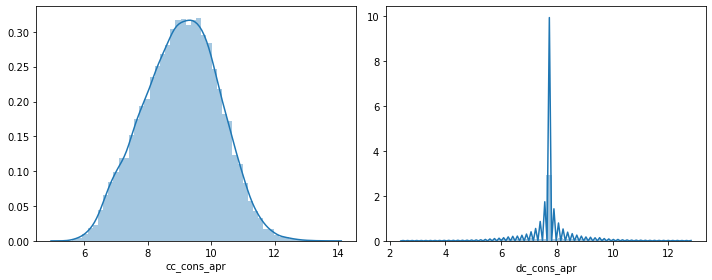

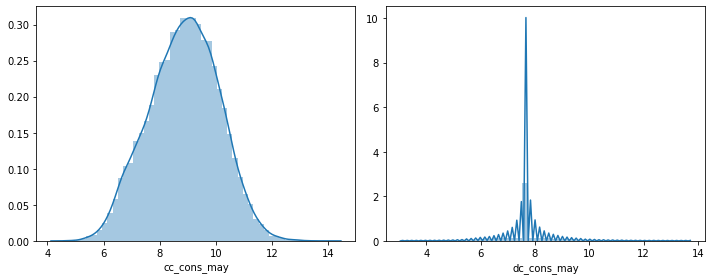

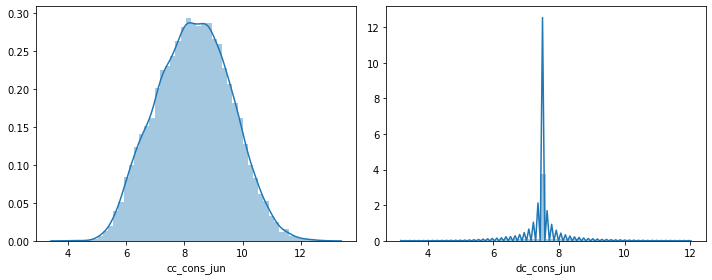

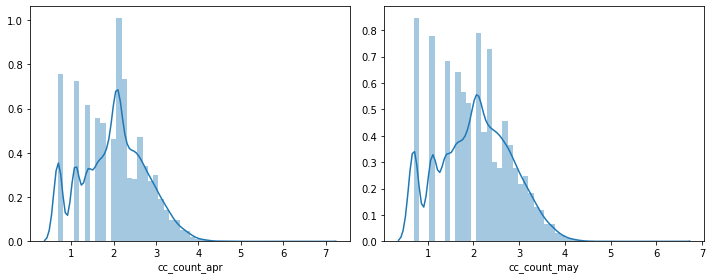

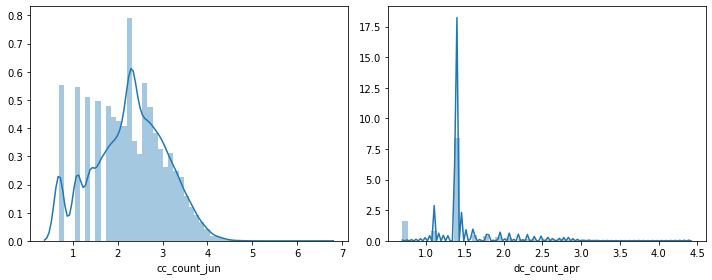

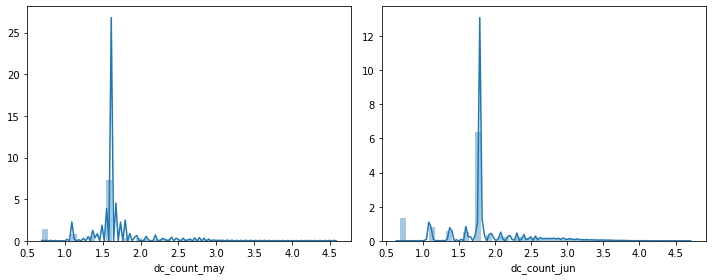

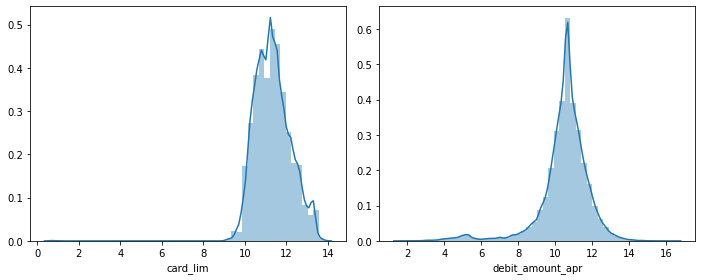

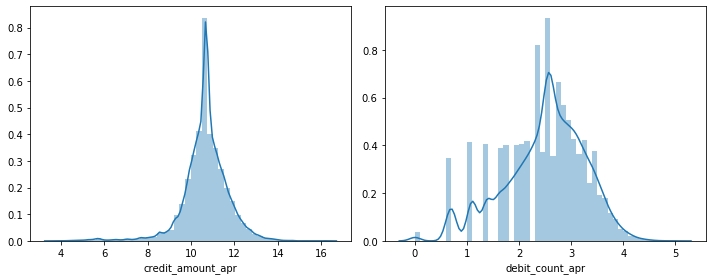

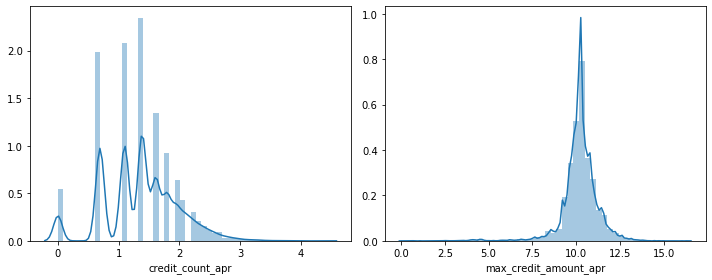

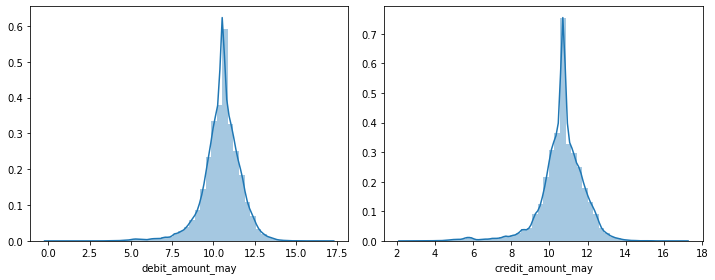

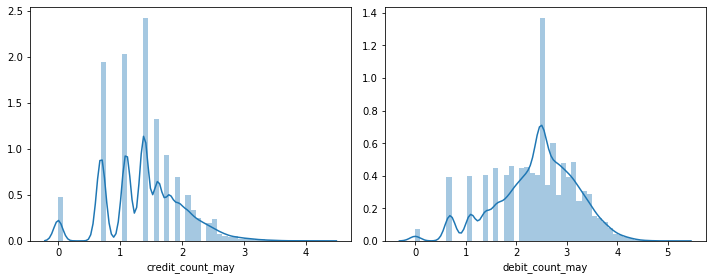

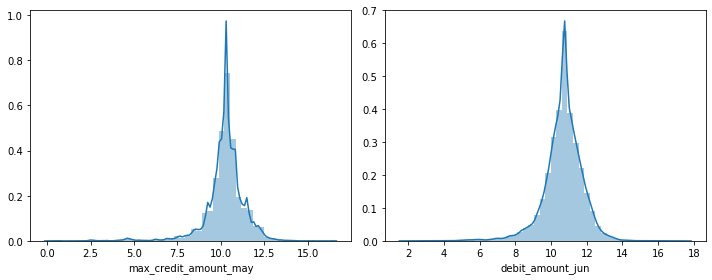

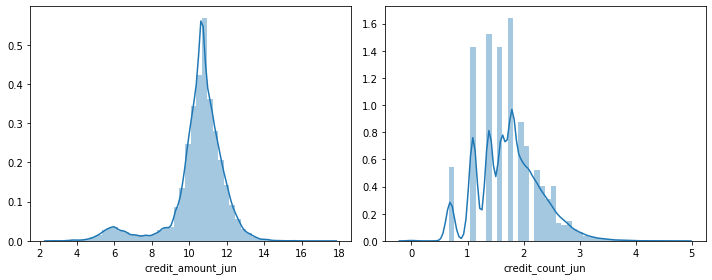

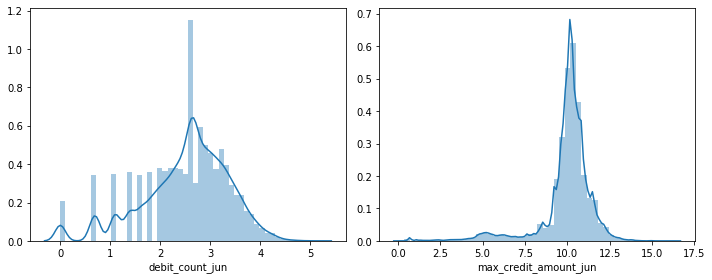

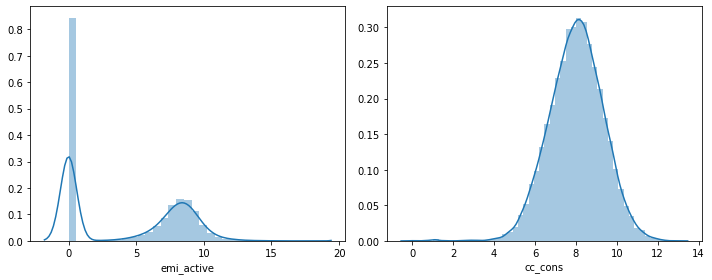

In [29]:
plot_cont(log_data,'distplot')

In [30]:
#converting the categorical features into numerical to initiate the ML process.
train_modified = pd.get_dummies(log_data)

In [31]:
train_modified.shape

(24615, 36)

In [32]:
log_data.shape

(24615, 34)

In [33]:
train_modified.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_current,account_type_saving,gender_F,gender_M
0,3.737670,6.584791,10.318672,7.738628,7.893755,7.665285,9.742952,7.508787,1.386294,1.098612,...,10.969198,1.609438,2.397895,10.888576,8.034206,9.406236,1,0,0,1
1,3.737670,6.261492,9.164616,7.532982,8.244597,6.162114,7.711997,6.677083,1.098612,1.791759,...,8.951181,1.098612,2.564949,8.936035,8.282493,6.523562,1,0,0,1
2,3.610918,6.762730,8.733145,7.738628,6.723352,7.665285,7.211372,7.508787,2.708050,1.791759,...,10.671997,1.791759,2.639057,10.198209,0.000000,5.303305,1,0,0,1
3,3.663562,5.857933,10.618362,7.738628,9.889926,7.665285,10.323763,7.508787,2.564949,2.197225,...,10.925903,1.386294,1.609438,10.308986,8.308955,7.424762,1,0,0,1
4,3.891820,6.261492,9.215029,7.738628,8.707318,7.665285,7.049602,7.508787,1.098612,1.609438,...,11.778998,2.197225,2.833213,10.915107,8.666525,7.380256,1,0,0,1


In [34]:
train_modified.columns

Index(['age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'account_type_current', 'account_type_saving', 'gender_F', 'gender_M'],
      dtype='object')

### Observations
    - The log conversion and scaling helped to stabilize the data set
    - The get dummies converted the categorical to numerical features.

### Machine Learning

In [35]:
# Create X & y and train & test dataset

X = train_modified.drop('cc_cons', axis=1)
y = train_modified['cc_cons']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

print(X_train.shape)
print(X_test.shape)

(19692, 35)
(4923, 35)


In [37]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [38]:
# training an SVR model
from  sklearn.svm import SVR


# # SVR
svr = SVR(kernel='rbf',C=5)
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

rmse = []

# # raw, normalized and standardized training and testing data
# trainX = [X_train, X_train_norm]
# testX = [X_test, X_test_norm]

model_ls = [(lr, 'Linear Regression'), (ls, 'Lasso'), (rd, 'Ridge'), (dr, 'Decision Tree Reg'), (rr, 'Random Forest Reg'), (svr, 'SVR')]
for item in model_ls:
    model = item[0]
    name = item[1]
    print(f'Running {name}')
    print('')
    
    # Train the model
    #model.fit(X_train, y_train)
    model.fit(X_train_norm, y_train)    
    # Predict the results
    #y_pred = model.predict(X_test)
    y_pred = model.predict(X_test_norm)
    # Calculate the root mean squared error
    error = round(np.sqrt(mean_squared_log_error(y_test, y_pred)), 2)
    
    # Print the value
    print(f'Root mean squared log error using {name} is {error}')
    print('-'*100)
    print('')
# model fitting and measuring RMSE
# for i in range(len(trainX)):
    
#     # fit
#     svr.fit(trainX[i],y_train)
#     # predict
#     pred = svr.predict(testX[i])
#     # RMSE
#     rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# # visualizing the result    
# df_svr = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized'])
# df_svr

Running Linear Regression

Root mean squared log error using Linear Regression is 0.14
----------------------------------------------------------------------------------------------------

Running Lasso

Root mean squared log error using Lasso is 0.16
----------------------------------------------------------------------------------------------------

Running Ridge

Root mean squared log error using Ridge is 0.14
----------------------------------------------------------------------------------------------------

Running Decision Tree Reg

Root mean squared log error using Decision Tree Reg is 0.2
----------------------------------------------------------------------------------------------------

Running Random Forest Reg

Root mean squared log error using Random Forest Reg is 0.14
----------------------------------------------------------------------------------------------------

Running SVR

Root mean squared log error using SVR is 0.14
---------------------------------------------

### Hyperparameter Tuning

In [39]:
#Linear Regression parameters
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [41]:
#Identifying the best paramters for Linear Regression
from sklearn.model_selection import GridSearchCV
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# selecting the model
lr = LinearRegression()
# selecting the parameter
param_grid = { 
'copy_X': ['True', 'False'],
'fit_intercept' : ['True', 'False'],
'normalize' : ['True', 'False']    
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(lr, param_grid=param_grid)
# fitting the model
grid_search_model.fit(X_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}


In [42]:
#Applying the best parameters in Linear Regression.

def grid_search_linear_regression_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    lr = LinearRegression(copy_X = True, fit_intercept = True, normalize = True)
    
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_val)
    #print(classification_report(y_val, y_pred))
    #print(confusion_matrix(y_val, y_pred))
        # Calculate the root mean squared error
    error = round(np.sqrt(mean_squared_log_error(y_test, y_pred)), 2)
    
    # Print the value
    print(f'Root mean squared log error is {error}')
    print('-'*100)
    print('')


grid_search_linear_regression_best(X,y)

Root mean squared log error is 0.15
----------------------------------------------------------------------------------------------------



### Observation on the Hyperparameter tuning
    - The Root Mean Square Log Error is the same for the below models after Hyperparameter tuning
         a) Linear Regression
         b) Ridge
         c) Random FOrest Regressor
    - The RMSLE is hogher than the normal model predictions and hence we are going to skip the hyperparameter tuning.

### Testing the Data

In [48]:
#Loading the test dataset and having a glimpse of first few records
test = pd.read_csv('data/TEST.csv')
test_data = test.copy()
test_data.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,16174,current,M,40,324,32205.49,NaN,13836.470,NaN,17693.000,...,2.0,10.0,68309.0,73432.40,103856.00,3.0,13.0,68409.0,NaN,0.00
1,19966,current,M,31,344,12059.40,759.00,2839.640,NaN,4923.220,...,1.0,4.0,1000.0,21272.83,10349.00,2.0,8.0,10000.0,NaN,0.00
2,18105,saving,M,40,534,10832.31,NaN,8198.155,NaN,4299.000,...,5.0,2.0,50000.0,39504.00,30389.58,4.0,7.0,20000.0,NaN,6026.40
3,1201,saving,M,34,923,17459.00,976.01,13186.500,NaN,7657.000,...,1.0,5.0,4500.0,2500.00,368.00,1.0,4.0,123.0,NaN,0.00
4,1595,current,M,35,523,870.59,13448.31,25143.960,5385.0,13515.775,...,15.0,34.0,29284.0,148340.26,164152.72,12.0,38.0,50000.0,NaN,7482.42


In [49]:
#With reference to above observations, the columns that had more than 50% of NaN values will be dropped.
#, 'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun'
test_data = test_data.drop(['id', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'loan_enq'], axis = True)

In [50]:
#Determining the percentage of NaN values in each feature.
(test_data.isnull().sum())/len(train_data)*100

account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
cc_cons_apr               0.000000
dc_cons_apr              19.146862
cc_cons_may               0.000000
dc_cons_may              17.546212
cc_cons_jun               0.000000
dc_cons_jun              21.775340
cc_count_apr              2.563478
cc_count_may              1.194394
cc_count_jun              1.673776
dc_count_apr             19.146862
dc_count_may             17.546212
dc_count_jun             15.588056
card_lim                  0.012188
debit_amount_apr          1.885029
credit_amount_apr         3.176925
debit_count_apr           1.714402
credit_count_apr          1.714402
max_credit_amount_apr     3.176925
debit_amount_may          2.226285
credit_amount_may         3.404428
credit_count_may          2.019094
debit_count_may           2.019094
max_credit_amount_may     3.404428
debit_amount_jun          2.031282
credit_amount_jun   

In [51]:
#Imputing the dataset with Median
test_data.fillna(test_data.median(), inplace = True)

In [52]:
#Determining the percentage of NaN values in each feature.
(test_data.isnull().sum())/len(train_data)*100

account_type             0.0
gender                   0.0
age                      0.0
region_code              0.0
cc_cons_apr              0.0
dc_cons_apr              0.0
cc_cons_may              0.0
dc_cons_may              0.0
cc_cons_jun              0.0
dc_cons_jun              0.0
cc_count_apr             0.0
cc_count_may             0.0
cc_count_jun             0.0
dc_count_apr             0.0
dc_count_may             0.0
dc_count_jun             0.0
card_lim                 0.0
debit_amount_apr         0.0
credit_amount_apr        0.0
debit_count_apr          0.0
credit_count_apr         0.0
max_credit_amount_apr    0.0
debit_amount_may         0.0
credit_amount_may        0.0
credit_count_may         0.0
debit_count_may          0.0
max_credit_amount_may    0.0
debit_amount_jun         0.0
credit_amount_jun        0.0
credit_count_jun         0.0
debit_count_jun          0.0
max_credit_amount_jun    0.0
emi_active               0.0
dtype: float64

In [53]:
#Converting the right skewed data into log
columns = test_data.select_dtypes(include='number')
test_log_data = test_data.copy()

for col in columns:
    test_log_data[col] = np.log(1 + test_log_data[col])

In [54]:
test_log_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,current,M,3.713572,5.783825,10.379923,7.719130,9.535135,7.656841,9.780981,7.527794,...,11.269554,1.098612,2.397895,11.131811,11.204134,11.550770,1.386294,2.639057,11.133274,0.000000
1,current,M,3.465736,5.843544,9.397683,6.633318,7.951785,7.656841,8.501921,7.527794,...,7.089243,0.693147,1.609438,6.908755,9.965233,9.244742,1.098612,2.197225,9.210440,0.000000
2,saving,M,3.713572,6.282267,9.290381,7.719130,9.011786,7.656841,8.366370,7.527794,...,11.102280,1.791759,1.098612,10.819798,10.584183,10.321888,1.609438,2.079442,9.903538,8.704071
3,saving,M,3.555348,6.828712,9.767668,6.884497,9.487025,7.656841,8.943506,7.527794,...,8.440960,0.693147,1.791759,8.412055,7.824446,5.910797,0.693147,1.609438,4.820282,0.000000
4,current,M,3.583519,6.261492,6.770319,9.506683,10.132413,8.591558,9.511687,7.527794,...,11.116076,2.772589,3.555348,10.284831,11.907271,12.008559,2.564949,3.663562,10.819798,8.920445


In [55]:
#converting the categorical features into numerical to initiate the ML process.
test_modified = pd.get_dummies(test_log_data)
test_modified.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,3.713572,5.783825,10.379923,7.719130,9.535135,7.656841,9.780981,7.527794,3.465736,2.995732,...,11.204134,11.550770,1.386294,2.639057,11.133274,0.000000,1,0,0,1
1,3.465736,5.843544,9.397683,6.633318,7.951785,7.656841,8.501921,7.527794,2.079442,2.397895,...,9.965233,9.244742,1.098612,2.197225,9.210440,0.000000,1,0,0,1
2,3.713572,6.282267,9.290381,7.719130,9.011786,7.656841,8.366370,7.527794,1.945910,2.079442,...,10.584183,10.321888,1.609438,2.079442,9.903538,8.704071,0,1,0,1
3,3.555348,6.828712,9.767668,6.884497,9.487025,7.656841,8.943506,7.527794,0.693147,2.079442,...,7.824446,5.910797,0.693147,1.609438,4.820282,0.000000,0,1,0,1
4,3.583519,6.261492,6.770319,9.506683,10.132413,8.591558,9.511687,7.527794,1.098612,2.397895,...,11.907271,12.008559,2.564949,3.663562,10.819798,8.920445,1,0,0,1


In [56]:
# Create X & y and train & test dataset

X2 = test_modified.copy()

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X2)

# transform data
X_test_norm = norm.transform(X2)


In [57]:
# Train the model
lr.fit(X_train, y_train)
    
# Predict the results
y_pred2 = lr.predict(X_test_norm)

#pd.DataFrame(y_pred2, columns=[ 'cc_cons']).to_csv('data/Submission.csv', index=True)
df_pred = pd.DataFrame(y_pred2, index=test.id, columns=['cc_cons'])
df_pred.to_csv('data/Submission.csv')